In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("housing_final.csv", sep=";")
df = df.drop(columns=["renta_es_proyeccion"])

df.head()

,ccaa,provincia,anio,precio_compra_m2,precio_alquiler_m2,renta_neta_anual,renta_mensual_neta,tipo_interes_hipoteca
0,Andalucia,Almería,2020,1082.6667,6.1083,9709.0000,809.0833,2.2333
1,Andalucia,Almería,2021,1082.4167,6.3000,10103.0000,841.9167,1.9904
2,Andalucia,Almería,2022,1116.5833,6.8000,10605.0000,883.7500,2.1038
3,Andalucia,Almería,2023,1174.7500,7.2333,11543.0000,961.9167,3.2812
4,Andalucia,Almería,2024,1254.8333,7.7750,12230.6471,1019.2206,3.4529


In [14]:
# Info general
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ccaa                   312 non-null    object 
 1   provincia              312 non-null    object 
 2   anio                   312 non-null    int64  
 3   precio_compra_m2       312 non-null    float64
 4   precio_alquiler_m2     312 non-null    float64
 5   renta_neta_anual       312 non-null    float64
 6   renta_mensual_neta     312 non-null    float64
 7   tipo_interes_hipoteca  312 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 19.6+ KB


,anio,precio_compra_m2,precio_alquiler_m2,renta_neta_anual,renta_mensual_neta,tipo_interes_hipoteca
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2022.500000,1554.559459,8.702123,14000.450739,1166.704229,2.689433
std,1.710569,726.859921,2.931579,2230.119698,185.843307,0.595570
min,2020.000000,741.200000,4.758300,9709.000000,809.083300,1.990400
25%,2021.000000,1079.333325,6.752050,12479.750000,1039.979200,2.103800
50%,2022.500000,1334.708350,7.920850,13838.000000,1153.166700,2.654150
75%,2024.000000,1765.395850,9.745850,15477.813325,1289.817775,3.281200
max,2025.000000,4935.000000,20.390000,22114.933400,1842.911100,3.452900


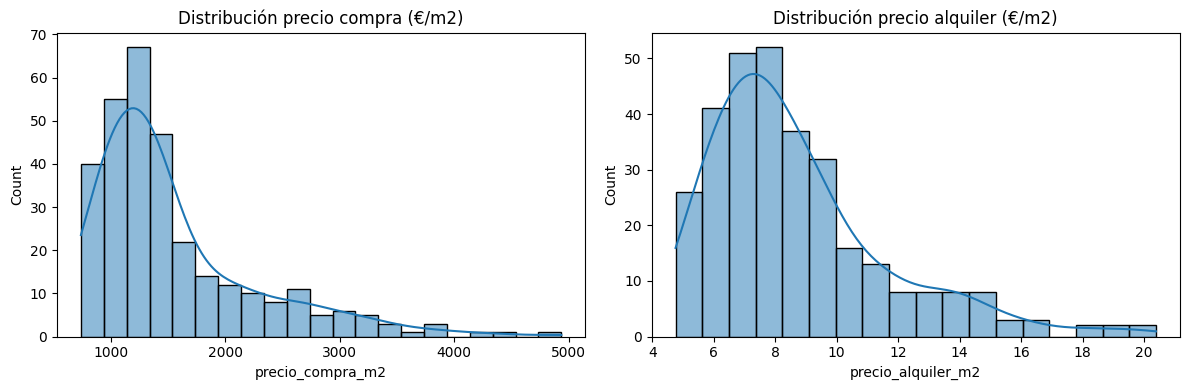

In [15]:
# Distribución de precios (compra y alquiler)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df["precio_compra_m2"], kde=True, ax=axes[0])
axes[0].set_title("Distribución precio compra (€/m2)")

sns.histplot(df["precio_alquiler_m2"], kde=True, ax=axes[1])
axes[1].set_title("Distribución precio alquiler (€/m2)")

plt.tight_layout()
plt.show()


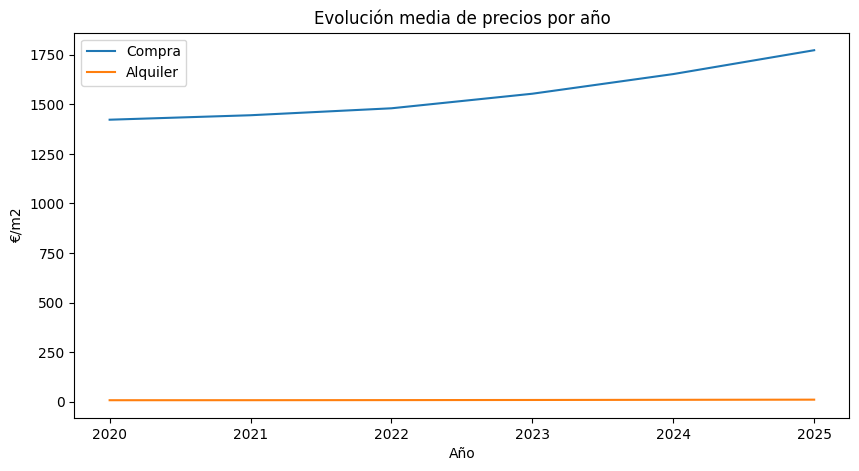

In [16]:
# Evolución temporal media por año
precios_anio = df.groupby("anio")[["precio_compra_m2", "precio_alquiler_m2"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(precios_anio["anio"], precios_anio["precio_compra_m2"], label="Compra")
plt.plot(precios_anio["anio"], precios_anio["precio_alquiler_m2"], label="Alquiler")
plt.legend()
plt.xlabel("Año")
plt.ylabel("€/m2")
plt.title("Evolución media de precios por año")
plt.show()


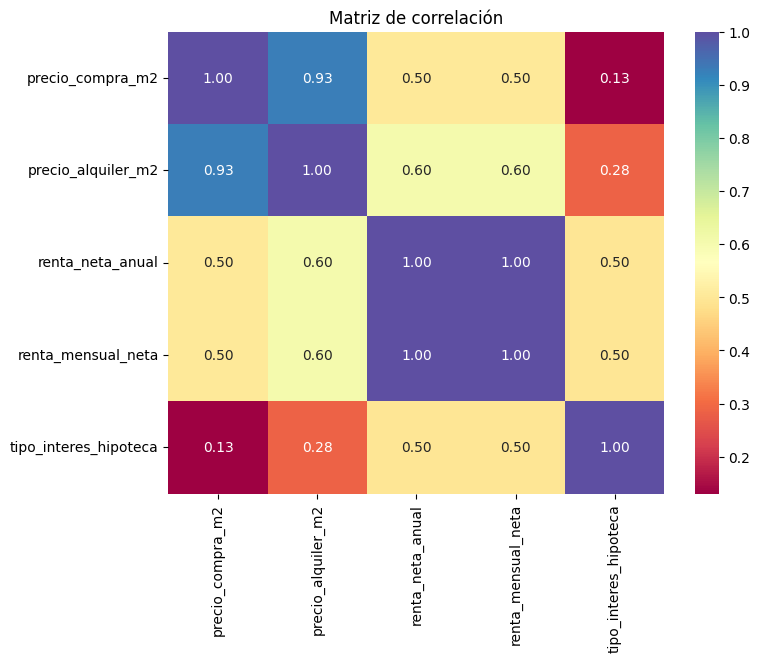

In [18]:
# Correlaciones numéricas
num_cols = ["precio_compra_m2", "precio_alquiler_m2",
            "renta_neta_anual", "renta_mensual_neta",
            "tipo_interes_hipoteca"]

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="Spectral")
plt.title("Matriz de correlación")
plt.show()


Compra y alquiler se mueven juntísimos. Si se modela uno, metes el otro como predictor.

La renta influye claramente (0.50–0.60).

Los tipos de interés tienen relación baja → normal: España ha tenido tipos bajos hasta 2022 y la subida es reciente, por lo que aún no hay tiempo para que afecten fuerte al dataset.

Cuidado: Si haces regresión, precio_compra y precio_alquiler están muy correlados (0.93) → colinealidad fuerte.

In [20]:
# Análisis por provincia

df.groupby("provincia")[["precio_compra_m2", "precio_alquiler_m2"]].mean().sort_values("precio_compra_m2", ascending=False).head(10)

,precio_compra_m2,precio_alquiler_m2
provincia,,
Baleares,3831.736133,14.852483
Gipúzcoa,3404.791650,14.666117
Madrid,3234.527800,15.893883
Málaga,2870.605567,12.410550
Vizcaya,2742.080550,12.601383
Barcelona,2703.933333,16.338617
Tenerife,2343.163900,11.301667
Girona,2222.700000,11.187217
Álava,2217.950000,10.516117


<Axes: xlabel='renta_mensual_neta', ylabel='precio_alquiler_m2'>

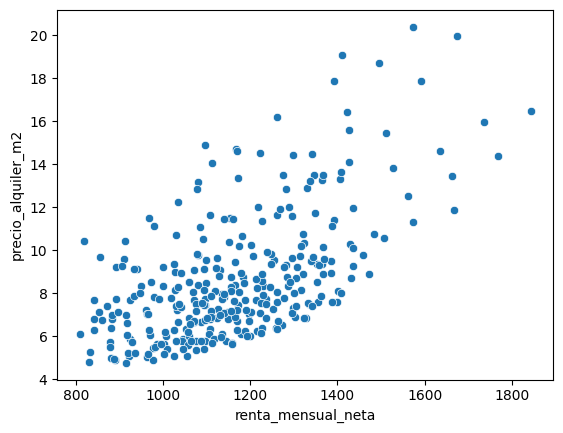

In [22]:
# Relación precio - venta

sns.scatterplot(data=df, x="renta_mensual_neta", y="precio_alquiler_m2")

<Axes: xlabel='renta_neta_anual', ylabel='precio_compra_m2'>

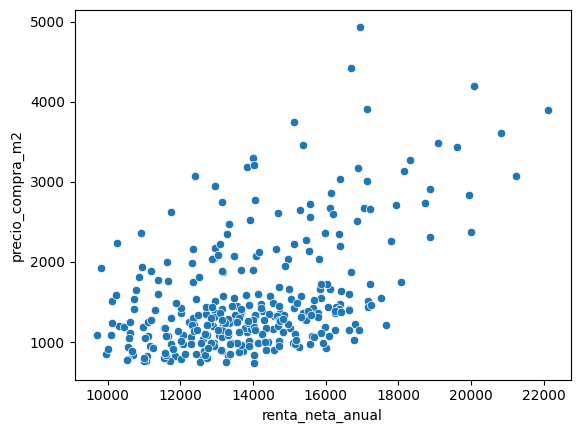

In [ ]:
sns.scatterplot(data=df, x="renta_neta_anual", y="precio_compra_m2")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Andalucia'),
  Text(1, 0, 'Aragon'),
  Text(2, 0, 'Asturias'),
  Text(3, 0, 'Baleares'),
  Text(4, 0, 'Canarias'),
  Text(5, 0, 'Cantabria'),
  Text(6, 0, 'CastillaLaMancha'),
  Text(7, 0, 'CastillaLeon'),
  Text(8, 0, 'Cataluña'),
  Text(9, 0, 'Ceuta'),
  Text(10, 0, 'ComunidadDeMadrid'),
  Text(11, 0, 'ComunidadValenciana'),
  Text(12, 0, 'Euskadi'),
  Text(13, 0, 'Extremadura'),
  Text(14, 0, 'Galicia'),
  Text(15, 0, 'La Rioja'),
  Text(16, 0, 'Melilla'),
  Text(17, 0, 'Murcia'),
  Text(18, 0, 'Navarra')])

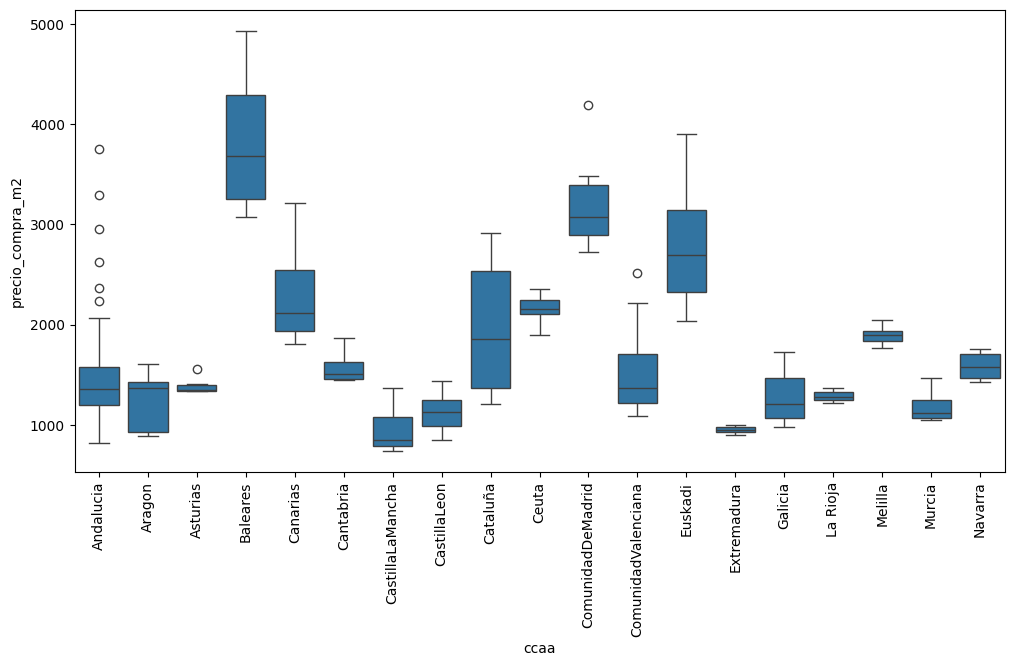

In [24]:
# Boxplots por comunidad autónoma

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="ccaa", y="precio_compra_m2")
plt.xticks(rotation=90)


In [25]:
# Colinealidad

import statsmodels.api as sm

sm.OLS(df["precio_compra_m2"], sm.add_constant(df[["precio_alquiler_m2","renta_neta_anual","tipo_interes_hipoteca"]])).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       precio_compra_m2   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     752.1
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          2.37e-141
Time:                        19:09:15   Log-Likelihood:                -2167.3
No. Observations:                 312   AIC:                             4343.
Df Residuals:                     308   BIC:                             4358.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -15.9065     95.182     -0.167      0.867    -203.197     171.384
precio_alquiler_m2      242.6559      6.143     39.500      0.000     230.568     254.744
renta_neta_anual         -0.0065      0.009     -0.732      0.465      -0.024       0.011
tipo_interes_hipoteca  -167.2165     27.789     -6.017      0.000    -221.897    -112.536
==============================================================================
Omnibus:                       51.044   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.918
Skew:                          -0.398   Prob(JB):                     3.82e-77
Kurtosis:                       8.142   Cond. No.                     9.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# se acaba eliminando la renta neta anual, porque la mensual tiene mayora aplicacion en modelos explicativos

df = df.drop(columns=["renta_neta_anual"])
